# Energy: Root mean square and Decibel

Inspired by and based on Valerio Velardo's 'The Sound of AI' 

- Link: https://www.youtube.com/watch?v=iCwMQJnKk2clist=PL-wATfeyAMNqIee7cH3q1bh4QJFAaeNv0




## 0. Install & import

In [12]:
import librosa
import librosa.display
import IPython
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# to do: https://docs.python.org/3/library/audioop.html
audioop.rms(fragment, width)

## 1. Basic example RMS Energy with Librosa

In [9]:
pwd

'/Users/michielbontenbal/Library/CloudStorage/OneDrive-HvA/GitHub/Audio_with_Python'

In [10]:
#display all .wav files
from glob import glob
my_wavs = glob('*.wav')
print(my_wavs)

['tone_220.wav', 'example.wav', 'tone_440.wav']


In [16]:
#select file and display it
audio_path = librosa.ex('trumpet')
print(audio_path)
IPython.display.Audio(audio_path)

/Users/michielbontenbal/Library/Caches/librosa/sorohanro_-_solo-trumpet-06.ogg


In [17]:
#load the file and print some data
y, sr = librosa.load(audio_path, sr=None)
print(f'y: {y[:10]}')
print(f'shape y: {y.shape[0]}')
print(f'sample rate: {sr}')
x= y.shape[0]/sr
print (f'the length of the sample is {x} seconds')

y: [-1.4068224e-03 -4.4607223e-04 -4.1098078e-04  9.9920901e-05
  4.3150427e-05 -1.7485349e-04 -3.6783377e-04  1.4553138e-04
  5.0557830e-04  1.4929948e-03]
shape y: 117601
sample rate: 22050
the length of the sample is 5.333378684807256 seconds


In [18]:
#check the sample rate
real_sr = librosa.get_samplerate(audio_path)
real_sr

22050

In [19]:
# source: https://librosa.org/doc/main/generated/librosa.feature.rms.html
#y, sr = librosa.load(librosa.ex('trumpet'))
rms =librosa.feature.rms(y=y)
print(rms)

[[8.82061347e-02 1.19593039e-01 1.41771898e-01 1.53228074e-01
  1.48611113e-01 1.42848745e-01 1.32098556e-01 1.12194963e-01
  1.14668153e-01 1.37663320e-01 1.59574330e-01 1.77827850e-01
  1.77262872e-01 1.57181546e-01 1.32081732e-01 1.11538008e-01
  1.00714311e-01 9.21301842e-02 9.28013325e-02 9.82836336e-02
  9.53741968e-02 8.79576355e-02 7.45981038e-02 6.69805706e-02
  1.06743999e-01 1.42608479e-01 1.65403605e-01 1.74326181e-01
  1.55548722e-01 1.23270683e-01 9.54816341e-02 8.21153149e-02
  7.05755949e-02 7.23984316e-02 7.51635879e-02 7.24307597e-02
  6.46076575e-02 6.69866130e-02 9.79824886e-02 1.26324624e-01
  1.55498222e-01 1.74244985e-01 1.58429831e-01 1.31993487e-01
  9.55493823e-02 8.22230205e-02 8.56179371e-02 1.01532832e-01
  1.22547925e-01 1.17850885e-01 1.26600996e-01 1.26063302e-01
  1.14919394e-01 1.05971031e-01 9.13474336e-02 7.40103647e-02
  5.76087646e-02 3.45474556e-02 2.35418342e-02 7.86662847e-02
  1.06070250e-01 1.08141080e-01 1.14438899e-01 9.71400663e-02
  7.2374

In [21]:
#or from a spectrogram
S, phase = librosa.magphase(librosa.stft(y))
rms = librosa.feature.rms(S=S)
print(rms[0:10])

[[3.05804758e-02 7.69040547e-02 9.88056208e-02 9.55187861e-02
  8.97435791e-02 8.58860783e-02 8.53613483e-02 7.84485228e-02
  4.22243490e-02 5.76749145e-02 1.12622917e-01 1.23031441e-01
  1.07856647e-01 9.22511861e-02 8.26264823e-02 6.90463291e-02
  4.61511604e-02 5.73539235e-02 6.19310564e-02 5.79539535e-02
  5.82212349e-02 5.91952917e-02 5.04649287e-02 2.41890408e-02
  3.06512860e-02 8.73672186e-02 1.20100811e-01 1.13793420e-01
  9.16944754e-02 7.28603679e-02 5.36196084e-02 3.82465421e-02
  4.64683993e-02 4.80615839e-02 4.33678100e-02 4.29878599e-02
  4.57115401e-02 3.54572415e-02 3.35836068e-02 7.86171906e-02
  1.04001712e-01 1.09675794e-01 1.09359135e-01 7.98228749e-02
  3.59618971e-02 1.74118020e-02 5.74160597e-02 7.59844246e-02
  5.95986541e-02 7.85403239e-02 8.18736316e-02 7.82324588e-02
  7.24317664e-02 6.26136373e-02 5.67216992e-02 5.01291445e-02
  2.73898738e-02 9.02750183e-03 5.11794349e-03 2.20486928e-02
  6.84636445e-02 8.97384005e-02 6.27941608e-02 3.96680257e-02
  5.5520

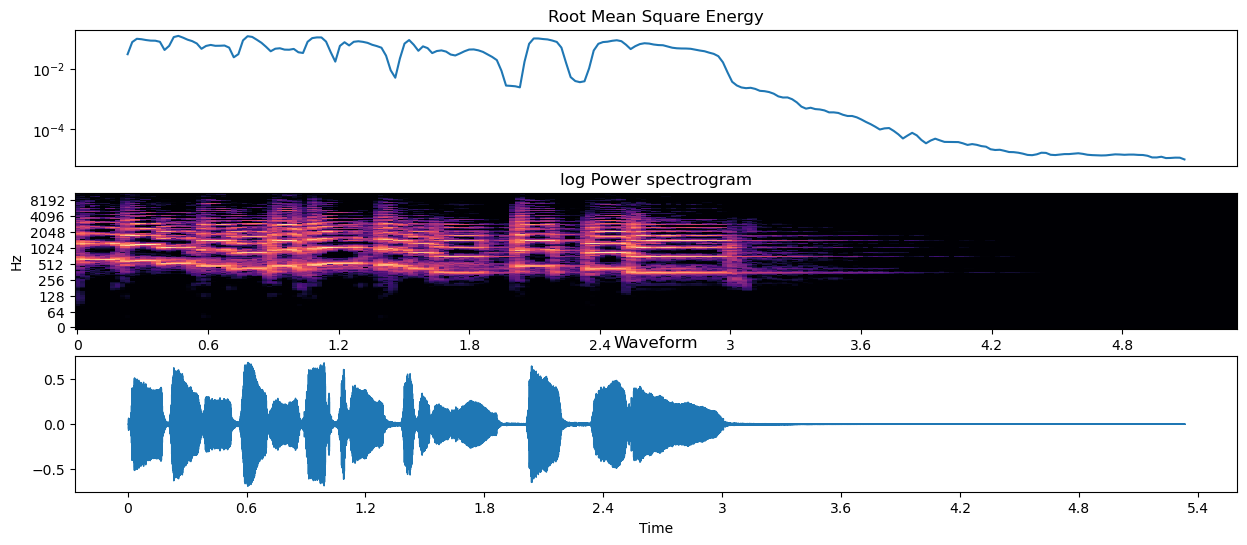

In [22]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=3, figsize=(15,6))
times = librosa.times_like(rms)
ax[0].set(title= 'Root Mean Square Energy')
ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
#ax[0].legend()
#ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time',ax=ax[1])
ax[1].set(title='log Power spectrogram')
S = librosa.magphase(librosa.stft(y, window=np.ones, center=False))[0]
librosa.feature.rms(y=y)
ax[2].set(title= 'Waveform')
librosa.display.waveshow(y, sr=sr)
plt.show()
IPython.display.Audio(audio_path)

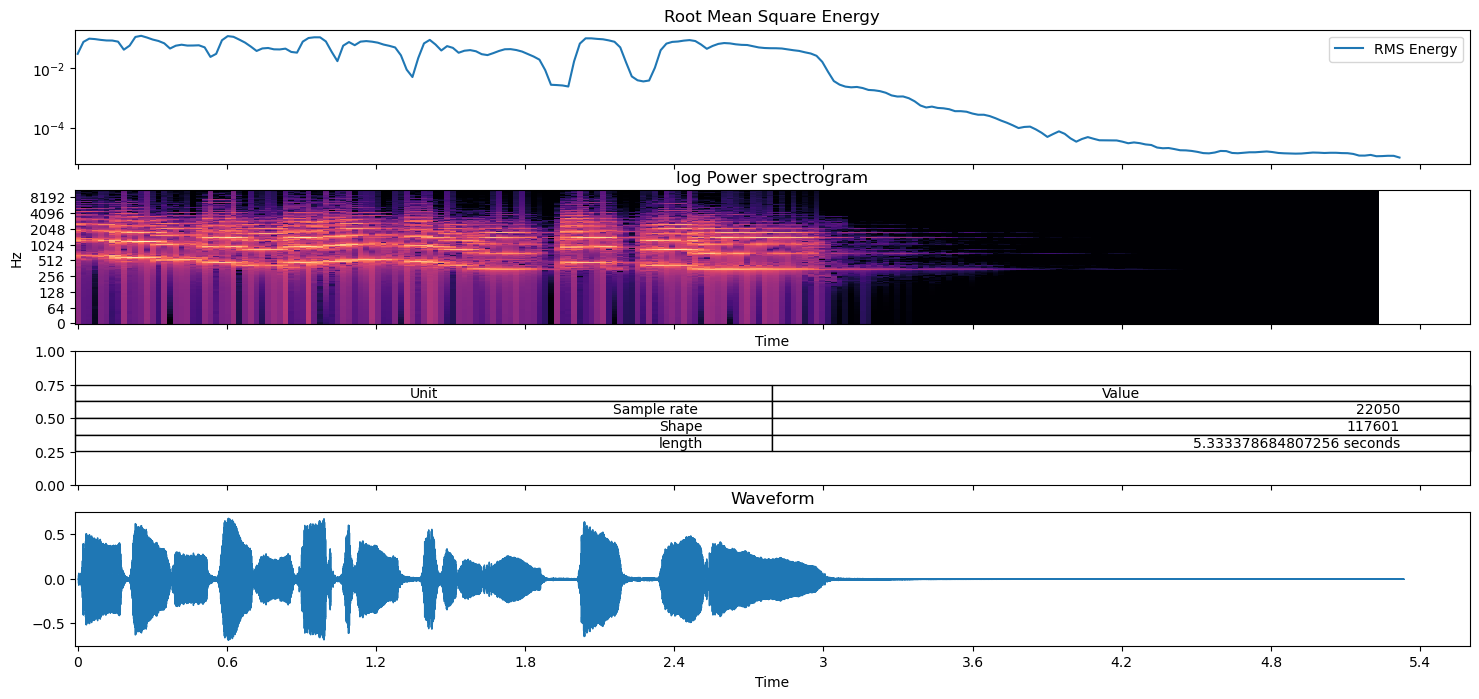

In [23]:
#as above but now with some metadata
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=4, sharex=True, figsize=(18,8))
times = librosa.times_like(rms)
ax[0].set(title= 'Root Mean Square Energy')
ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time',ax=ax[1])
ax[1].set(title='log Power spectrogram')
S = librosa.magphase(librosa.stft(y, window=np.ones, center=False))[0]
librosa.feature.rms(y=y)
ax[3].set(title= 'Waveform')
librosa.display.waveshow(y, sr=sr) # used to be: librosa.display.waveplot
clust_data = [["Sample rate ", real_sr],['Shape', y.shape[0]], ['length', (f'{x} seconds')]]
collabel=("Unit", 'Value')
#ax[3].axis('tight')
#ax[3].axis('off')
the_table = ax[2].table(cellText=clust_data,colLabels=collabel,loc='center')
plt.show()

## 2. RMS Energy with Librosa advanced example

In [3]:
from glob import glob
my_wavs=glob('*.wav')
print(my_wavs)

['tone_220.wav', 'example.wav', 'tone_440.wav']


In [4]:
#define the Frame Size and Hop length
audio_file='tone_220.wav'
FRAME_SIZE = 1024
HOP_LENGTH = FRAME_SIZE / 2
print(audio_file)

tone_220.wav


In [ ]:
import librosa
y, sr = librosa.load(audio_file) #get the audio data and sample rate
print(y)
len_y= len(y)
print(f'Length of the file is: {len_y} ')
print(f'The sample rate is: {sr}')

[ 0.          0.03131104  0.0625     ... -0.09350586 -0.06253052
 -0.03134155]
Length of the file is: 110250 
The sample rate is: 22050


In [7]:
#let's get the RMS value
rms_file = librosa.feature.rms(y=y)
print(type(rms_file))
print(rms_file)

<class 'numpy.ndarray'>
[[0.24948804 0.30674934 0.35404778 0.3539077  0.35320443 0.35305348
  0.35369468 0.35411102 0.35364336 0.35303205 0.35324714 0.35394654
  0.35402143 0.3533532  0.35300082 0.35352424 0.35409272 0.3538059
  0.353118   0.35311973 0.35380834 0.35409132 0.3535207  0.35300046
  0.35335654 0.35402384 0.35394484 0.3532446  0.35303304 0.35364577
  0.3541104  0.353691   0.3530518  0.35320735 0.35391083 0.35404712
  0.35340047 0.35299534 0.35347474 0.3540772  0.3538483  0.35315028
  0.35309035 0.35376403 0.3541027  0.35357037 0.35301012 0.35331076
  0.353995   0.35397795 0.35328674 0.35301715 0.3535974  0.3541069
  0.35373867 0.3530757  0.3531696  0.35387087 0.35406736 0.35344806
  0.35299408 0.3534267  0.35405913 0.3538896  0.3531865  0.3530644
  0.35371712 0.35410863 0.3536191  0.3530237  0.35326755 0.35396367
  0.3540087  0.3533314  0.3530051  0.3535477  0.35409778 0.35378402
  0.35310322 0.3531355  0.3538298  0.35408515 0.3534972  0.3529973
  0.35337868 0.35403553 0.35

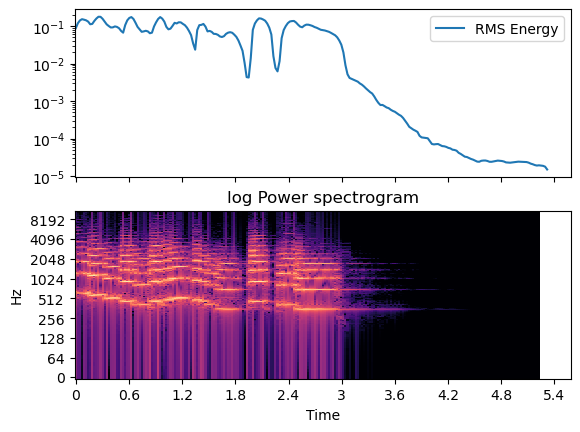

In [24]:
#Plotting the RMS value
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, sharex=True)
rms = librosa.feature.rms(y=y)
times = librosa.times_like(rms)
ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')
S = librosa.magphase(librosa.stft(y, window=np.ones, center=False))[0]
librosa.feature.rms(y=y)
plt.show()

## 3. Sound Pressure level
source: https://solveforum.com/forums/threads/solved-how-to-plot-graph-automatically-sound-pressure-level.694103/

In [2]:
!pip install pysine

In [ ]:
%matplotlib inline
import pyaudio
import numpy as np
import threading
from pysine import sine
import math
import audioop #standard python library. https://docs.python.org/3/library/audioop.html Deprecated in 3.11 !
from pysine import sine
import matplotlib.pyplot as plt
from scipy.io import wavfile
import seaborn as sns
import pylab #confusing library


CHUNK = 1024*4
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
pa = pyaudio.PyAudio()
stream = pa.open(format=FORMAT,
                    channels=CHANNELS,
                    rate=RATE,
                    input=True,
                    frames_per_buffer=CHUNK)



def Frequency():
    
    frequencyList = [20,30,40,50,60,70,80,90,100,200,300,400,500,600,700,800,900,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,12000,14000,16000,18000,20000]
    for frequency in frequencyList:
        sine(frequency = (float(frequency)),duration = 2.0)
    

def print_sound():
    while True:
        total = 0
        data = stream.read(CHUNK,exception_on_overflow=False)
        reading = audioop.max(data, 2)
        total = 20 * (math.log10(abs(reading))) #convert to dB
        print(int(total))

t1 = threading.Thread(target=print_sound)
t2 = threading.Thread(target=Frequency)
t1.start()
#t2.start()

48
47
50
50
49
49
50
50
49
49
50
49
47
48
50
48
48
48
45
47
45
50
50
46
46
48
48
48
47
48
49
47
50
47
47
50
47
46
46
49
46
46
45
46
44
50
50
51
51
50
50
51
51
50
51
53
50
49
53
53
50
49
50
47
50
47
50
49
47
48
47
46
45
49
46
44
46
45
44
49
49
48
47
46
48
50
47
45
46
41
45
48
48
48
46
47
45
49
47
49
46
46
43
47
47
46
45
46
44
45
47
49
45
50
47
46
45
46
49
46
45
44
45
48
47
48
47
48
49
50
49
50
45
47
49
48
47
46
47
49
50
46
49
49
49
51
50
48
45
49
43
48
50
47
48
44
48
48
48
49
49
46
47
47
46
48
46
50
46
48
49
48
48
47
49
50
49
50
49
46
46
47
47
47
45
47
45
46
48
48
48
50
47
48
51
47
45
52
49
50
49
46
47
48
46
47
50
58
46
47
49
47
47
48
46
46
44
53
53
52
49
46
46
46
46
45
49
45
47
45
56
49
45
46
48
43
48
53
53
48
67
57
53
48
47
49
50
48
47
48
47
45
46
48
48
46
47
50
49
46
47
50
49
64
48
48
76
57
49
49
49
52
45
51
48
48
47
46
51
50
47
47
48
47
46
47
49
48
47
47
50
49
51
50
50
49
47
48
46
45
48
49
48
51
50
51
50
46
47
46
48
50
48
45
49
48
49
48
48
48
47
47
48
48
48
46
49
48
50
50
49
47
46
4

### Live plotting of the calculated dB

In [2]:
%matplotlib inline
import pyaudio
import math
import audioop #standard python library. https://docs.python.org/3/library/audioop.html Deprecated in 3.11 !
import time
import matplotlib.pyplot as plt

CHUNK = 1024*4
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
pa = pyaudio.PyAudio()
stream = pa.open(format=FORMAT,
                    channels=CHANNELS,
                    rate=RATE,
                    input=True,
                    frames_per_buffer=CHUNK)

plt.rcParams['animation.html'] = 'jshtml'

fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()
i = 0
x, y = [],[]

while True:
    total = 0
    data = stream.read(CHUNK,exception_on_overflow=False)
    reading = audioop.max(data, 2)
    total = 20 * (math.log10(abs(reading)))
    #print(int(total))
    x.append(i)
    y.append(int(total))
    ax.plot(x,y, color='r')
    
    fig.canvas.draw()
    
    ax.set_xlim(left=max(0, i-50), right=i+30)
    
    time.sleep(0.5)
    i += 1

/var/folders/cj/qtbz9fvd3svc0x28yv2756mh0000gn/T/ipykernel_3638/132250572.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


KeyboardInterrupt: 